# Analyzing Time Series Data

## Contents List:

#### 1. Import libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time-series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarize the data using differencing

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

plt.style.use('fivethirtyeight')

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import merged_with_income_code.csv

path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\Causes_of_Death_Worldwide_Analysis_Susan_Lee'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_with_income_code.csv'), index_col = False)

In [4]:
# Set the max columns and rows to none

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,South Asia,Low income,both,1
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,South Asia,Low income,both,1
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,South Asia,Low income,both,1
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,South Asia,Low income,both,1
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,South Asia,Low income,both,1


In [6]:
df.shape

(6030, 38)

## 2. Subsetting, wrangling, and cleaning time-series data

### Create subset for India's maternal disorders

In [7]:
df_india_sub_1 = df.loc[(df['Code'] == 'IND')]

In [8]:
df_india_sub_1.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Region,Income group,_merge,Income code
2400,India,IND,2007,62224,53407,26269,67671,68053,67595,44087,69323,163270,6092,490850,1812605,525259,692363,18619,195456,2051,849219,10811,601219,2269,171589,163299,5556,47214,190881,875894,230556,415019,24467,61028,South Asia,Lower middle income,both,2
2401,India,IND,2008,60843,56488,27779,63747,62028,67494,44464,66685,155231,6120,492343,1897232,521542,679052,19487,194152,1738,845116,10714,625818,2580,179626,168171,5573,43721,199985,913387,238390,424444,24771,60371,South Asia,Lower middle income,both,2
2402,India,IND,2009,58449,59418,27243,58734,58617,65811,43077,63708,142325,6216,474490,1898640,500924,663701,19473,190547,1773,802659,10732,634222,2319,177064,165221,5323,39887,202133,890411,236152,415534,24568,57677,South Asia,Lower middle income,both,2
2403,India,IND,2012,53433,75330,30619,51001,42686,66282,39520,55026,101377,6023,461592,2119847,480048,614052,20471,198142,335,761001,11672,707505,1074,207229,178139,4772,32879,218869,958036,247920,422871,24864,53069,South Asia,Lower middle income,both,2
2404,India,IND,2013,52065,84796,34226,47070,32921,63122,39234,53088,91805,6495,466722,2200623,485209,604279,20511,192867,6562,738243,12197,739345,624,218827,185457,4617,29696,213635,1013921,246916,425083,24815,47702,South Asia,Lower middle income,both,2


In [9]:
df_india_sub_1.shape

(30, 38)

In [10]:
# Create a subset for India's maternal disorders

df_india_sub_1_filtered = df_india_sub_1.filter(['Year','Maternal Disorders'], axis=1)

In [11]:
df_india_sub_1_filtered.head()

,Year,Maternal Disorders
2400,2007,69323
2401,2008,66685
2402,2009,63708
2403,2012,55026
2404,2013,53088


In [12]:
df_india_sub_1_filtered.shape

(30, 2)

In [27]:
# Set the 'Year' column as the index

from datetime import datetime

df_india_sub_1_filtered['datetime'] = pd.to_datetime(df_india_sub_1_filtered['Year'], format='%Y') # Create a datetime column from 'Year'
df_india_sub_1_filtered = df_india_sub_1_filtered.set_index('datetime') # Set the datetime as the index of the dataframe
df_india_sub_1_filtered.drop(['Year'], axis=1, inplace = True) # Drop the 'Year' column
df_india_sub_1_filtered.head()

,Maternal Disorders
datetime,
2007-01-01,69323
2008-01-01,66685
2009-01-01,63708
2012-01-01,55026
2013-01-01,53088


In [33]:
# Sort the datetime in ascending order

df_india_sub_1_filtered.sort_index(inplace=True)

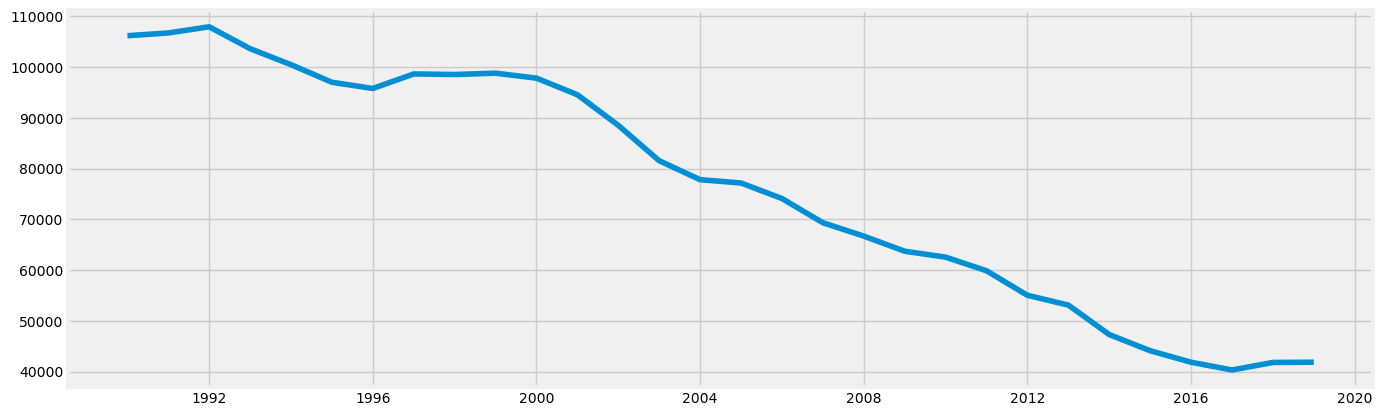

In [34]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_india_sub_1_filtered)

In [35]:
# Check for missing values

df_india_sub_1_filtered.isnull().sum() 

Maternal Disorders    0
dtype: int64

#### There are no missing values.

In [36]:
# Check for duplicates

dups = df_india_sub_1_filtered.duplicated()
dups.sum()

0

#### There are no duplicates.

## 3. Time-series analysis: decomposition

In [37]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_india_sub_1_filtered, model='additive')

In [38]:
from pylab import rcParams # This will define a fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

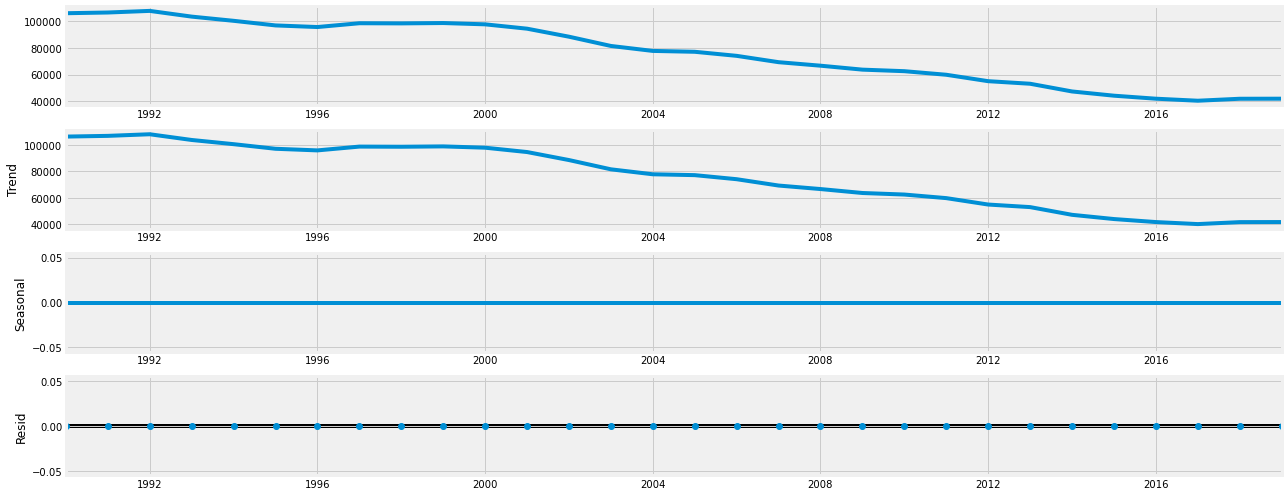

In [39]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The trend in the chart above gradually decreases in a linear fashion. There is no seasonality or noise.

## 4. Testing for stationarity

In [40]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_india_sub_1_filtered['Maternal Disorders'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.576820
p-value                         0.876134
Number of Lags Used             1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


#### My null hypothesis is there is a unit root. Since the test statistic (-0.57682) is larger than the critical values, we cannot reject the null hypothesis. There is also an unsatisfactory p-value (p>0.05). This means there is a unit root and the data is non-stationary.

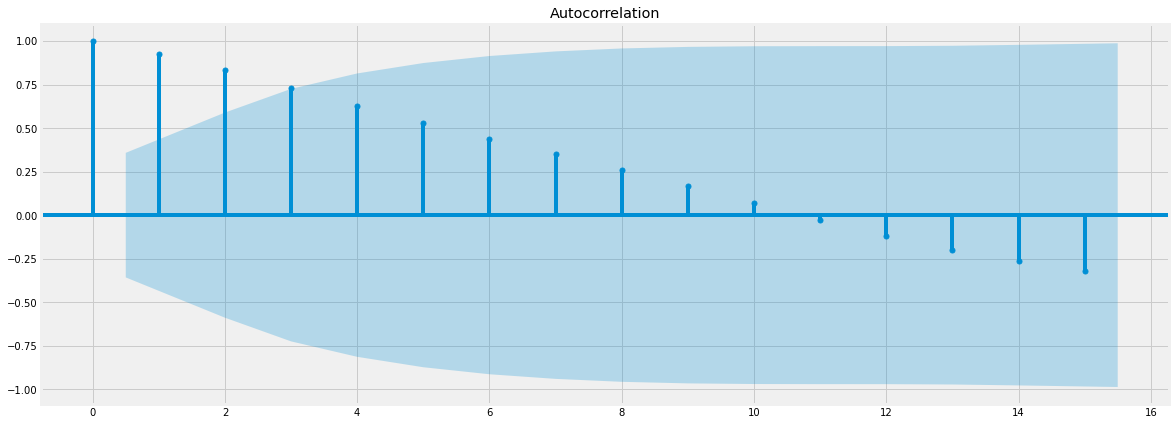

In [41]:
# Create a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_india_sub_1_filtered)
plt.show()

## 5. Stationarize the data using differencing

In [42]:
data_diff_1 = df_india_sub_1_filtered - df_india_sub_1_filtered.shift(1)

In [44]:
data_diff_1.dropna(inplace = True)

In [45]:
data_diff_1.head()

,Maternal Disorders
datetime,
1991-01-01,542.0
1992-01-01,1214.0
1993-01-01,-4315.0
1994-01-01,-3154.0
1995-01-01,-3465.0


In [46]:
data_diff_1.columns

Index(['Maternal Disorders'], dtype='object')

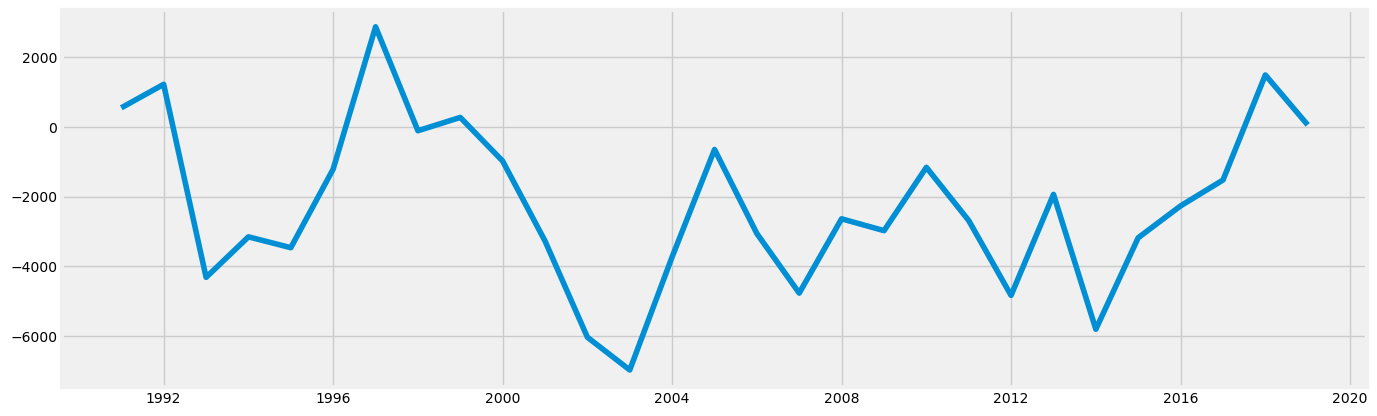

In [47]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

#### The curve no longer has a dominant downward trend.

In [48]:
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.172355
p-value                         0.021642
Number of Lags Used             0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


#### The test statistic (-3.172355) is now smaller than the critical value at both the 5% and 10% significance levels. There is also a satisfactory p-value (p<0.05). This means we can reject the null hypothesis and, as a result, consider the series stationary.

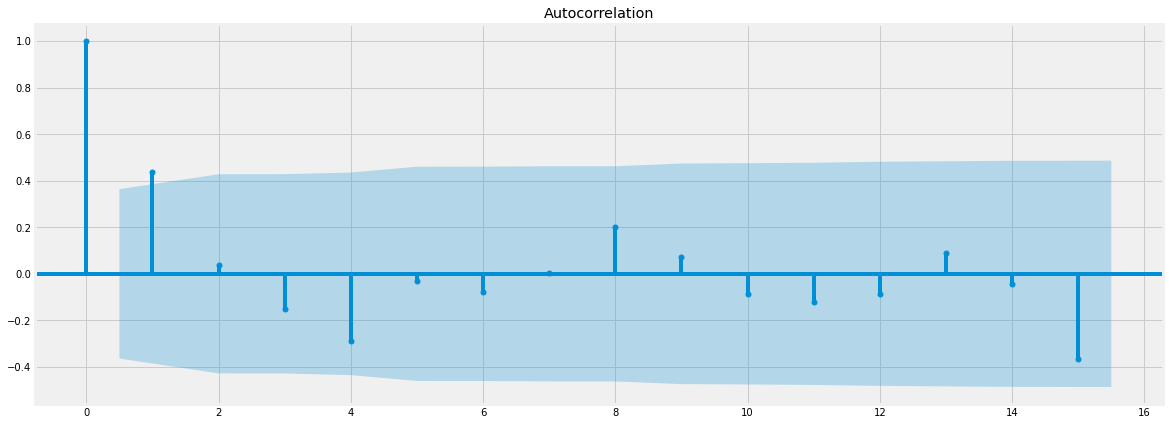

In [49]:
plot_acf(data_diff_1)
plt.show()

#### There are fewer lines above the blue confidence interval compared to before we performed differencing.